In [1]:
import sys
sys.path.append('../Codes/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sc
from Immuno_models import*
from matplotlib import style
style.use('seaborn-paper')

%autosave 60

Autosaving every 60 seconds


Text(0.5, 1.05, 'A line plot on a polar axis')

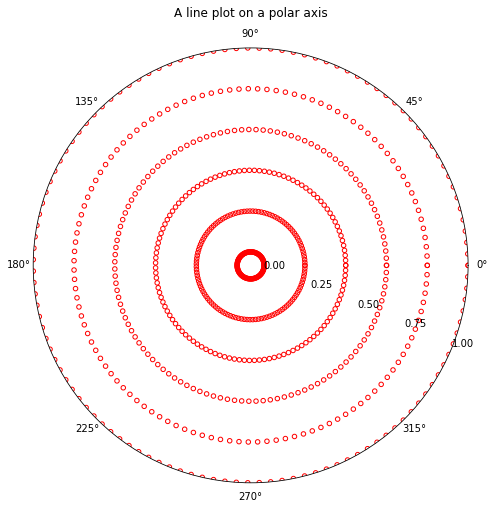

In [2]:
L = 5
r = np.linspace(0, 1, L+1)
thetas = np.linspace(0, 2*np.pi, np.math.factorial(L))
fig, ax = plt.subplots(1,1, figsize = (10,8),subplot_kw={'projection': 'polar'})
for theta in thetas:
    ax.scatter(np.ones_like(r)*theta, r, s=20, marker = 'o', facecolors='none', edgecolors='r')
ax.set_rmax(1)
ax.set_rticks(np.linspace(0,1,5))  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(False)

ax.set_title("A line plot on a polar axis", va='bottom')

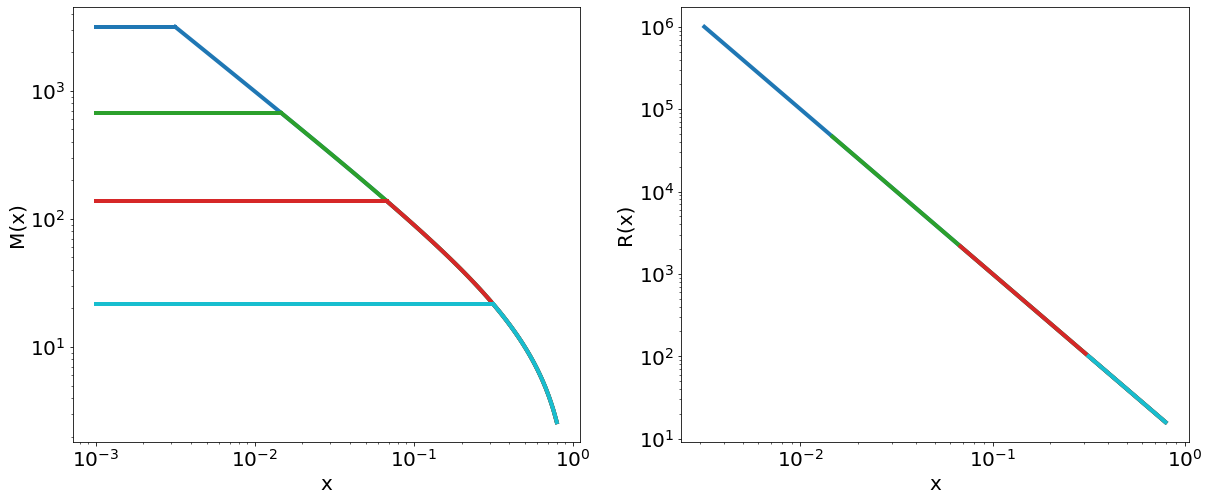

In [2]:
U = 10
L = 1
t = np.linspace(0,1,100)
fig, ax = plt.subplots(1,2, figsize=(20,8))
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:cyan']
for x_tilde, color in zip (np.logspace(-2.5, -0.5, 4), colors):
    x1 = np.logspace(-3,np.log10(x_tilde),100)
    x2 = np.logspace(np.log10(x_tilde),-0.1,100)
    M = (U/L)*((1/x2) - 1)
    R = (U/L)*((1/x2)**2)
    ax[0].plot(x1, (U/L)*(x_tilde**(-1)-1)*np.ones_like(x1), color = color, linewidth = 4)
    ax[0].plot(x2, M, color = color, linewidth = 4)
    
    #ax[1].plot(x1, np.zeros_like(x1), color = 'tab:red', linewidth = 4)
    ax[1].plot(x2, R, color = color, linewidth = 4)
    
ax[0].set_xlabel('x', fontsize = 20)
ax[0].set_ylabel('M(x)', fontsize = 20)
ax[0].tick_params(labelsize = 20)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].set_xlabel('x', fontsize = 20)
ax[1].set_ylabel('R(x)', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].set_xscale('log')
ax[1].set_yscale('log')

fig.savefig('../Figures/M_P.png')


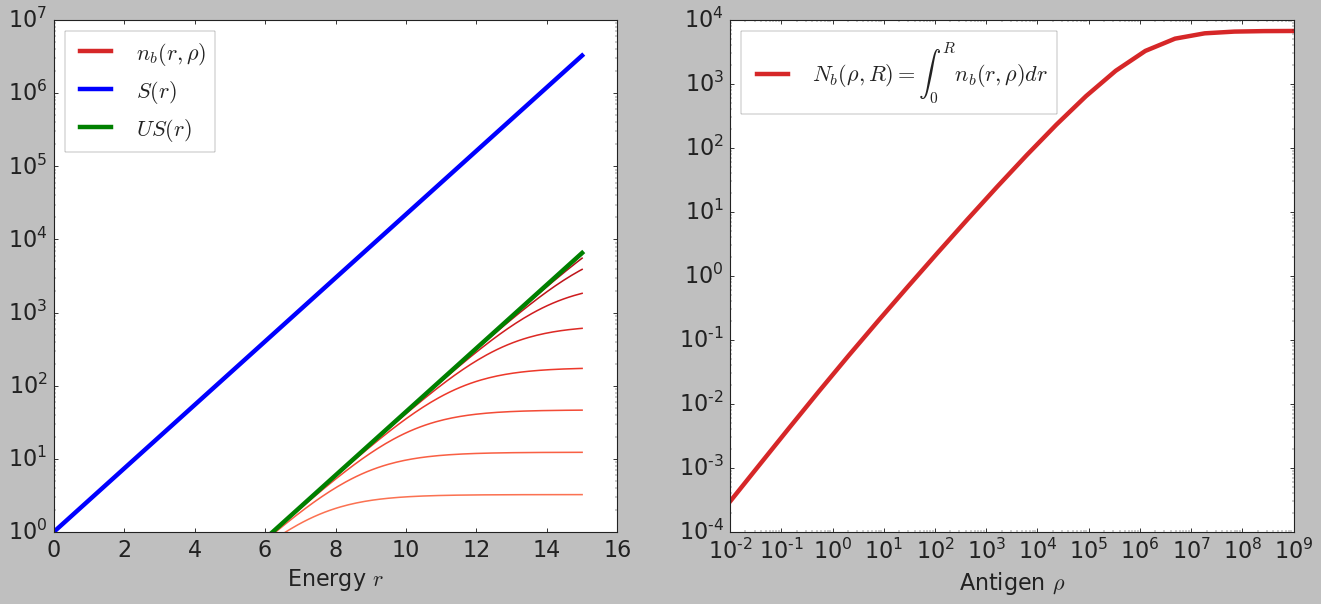

In [13]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

U = 2e-3
R = 9
l = 1

fig, ax = plt.subplots(1,2,figsize=(20,8))
rho_array = np.logspace(-2, 9, 20)
r_array = np.linspace(0,15,200)
colors = plt.cm.Reds(np.linspace(0,1,len(rho_array)))

ax[0].plot(r_array, np.exp(l*r_array), label = '$S(r)$', color = 'blue', linewidth = 4)
for i, rho in enumerate(rho_array):
    ax[0].plot(r_array, U*np.exp(l*r_array)*(1/(1+np.exp(r_array-np.log(rho)))), color = colors[i])
    
ax[0].plot(r_array, U*np.exp(l*r_array), label = '$US(r)$', color = 'green', linewidth = 4)
ax[0].set_yscale('log')
ax[0].set_ylim(1,1e7)
ax[0].set_xlabel(r'Energy $r$', fontsize = 20)
ax[0].set_ylabel(r'', fontsize = 20)
ax[0].tick_params(labelsize = 20)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(np.concatenate(([Line2D([0], [0], color='tab:red', linewidth=4, linestyle='solid', ms = 8)],handles)),np.concatenate(([r'$n_b(r, \rho)$'],labels)), loc = 0, fontsize = 20)

#___________________________________________________________________


ax[1].plot(rho_array, [np.cumsum(U*np.exp(l*r_array)*(1/(1+np.exp(r_array-np.log(rho))))*(15/200))[-1] for rho in rho_array], label = r'$N_b(\rho, R) = \int_0^Rn_b(r, \rho)dr$', color = 'tab:red', linewidth = 4)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Antigen $\rho$', fontsize = 20)
ax[1].set_ylabel(r'', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].legend(loc = 0, fontsize = 20)
fig.savefig('../Figures/Seq_densities.png')

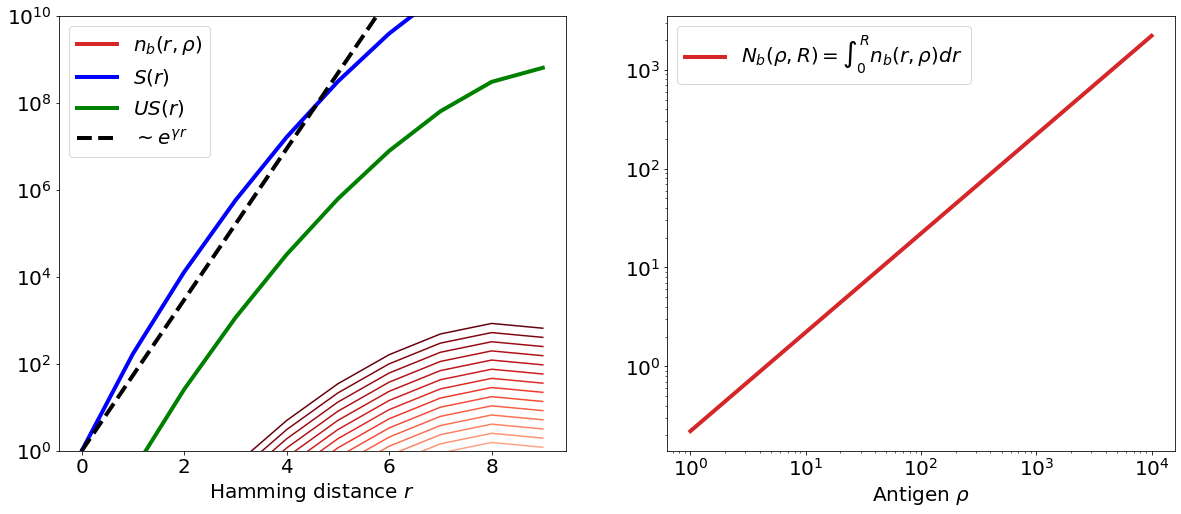

In [28]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

U = 2e-3
R = 6
l = 1
fig, ax = plt.subplots(1,2,figsize=(20,8))
rho_array = np.logspace(0, 4, 20)
r_array = np.linspace(0,9,10)
colors = plt.cm.Reds(np.linspace(0,1,len(rho_array)))

ax[0].plot(r_array, sc.comb(9, r_array)*((20-1)**r_array), label = '$S(r)$', color = 'blue', linewidth = 4)
for i, rho in enumerate(rho_array):
    ax[0].plot(r_array, U*sc.comb(9, r_array)*((20-1)**r_array)*(1/(1+np.exp(14+r_array-np.log(rho)))), color = colors[i])
    
ax[0].plot(r_array, U*sc.comb(9, r_array)*((20-1)**r_array), label = '$US(r)$', color = 'green', linewidth = 4)
ax[0].plot(r_array, np.exp(4*r_array), label = r'$\sim e^{\gamma r}$', color = 'black', linestyle = 'dashed', linewidth = 4)


ax[0].set_yscale('log')
ax[0].set_ylim(1,1e10)
ax[0].set_xlabel(r'Hamming distance $r$', fontsize = 20)
ax[0].set_ylabel(r'', fontsize = 20)
ax[0].tick_params(labelsize = 20)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(np.concatenate(([Line2D([0], [0], color='tab:red', linewidth=4, linestyle='solid', ms = 8)],handles)),np.concatenate(([r'$n_b(r, \rho)$'],labels)), loc = 0, fontsize = 20)

#___________________________________________________________________


ax[1].plot(rho_array, [np.cumsum(U*sc.comb(9, r_array)*((20-1)**r_array)*(1/(1+np.exp(14+r_array-np.log(rho)))))[-1] for rho in rho_array], label = r'$N_b(\rho, R) = \int_0^Rn_b(r, \rho)dr$', color = 'tab:red', linewidth = 4)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Antigen $\rho$', fontsize = 20)
ax[1].set_ylabel(r'', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].legend(loc = 0, fontsize = 20)
fig.savefig('../Figures/Seq_densities.png')

## Solving for $\rho$ in the case of infection

In [7]:
def n_r(rho, R, U, l):
    r_array = np.linspace(0, R, 1000)
    delta_r = R/1000
    return sum((U*np.exp(l*r_array)*delta_r)/(1+np.exp(r_array-np.log(rho))))

In [8]:
n_r(1e7, 1e-3, 2, 10)

0.0020100332324966036

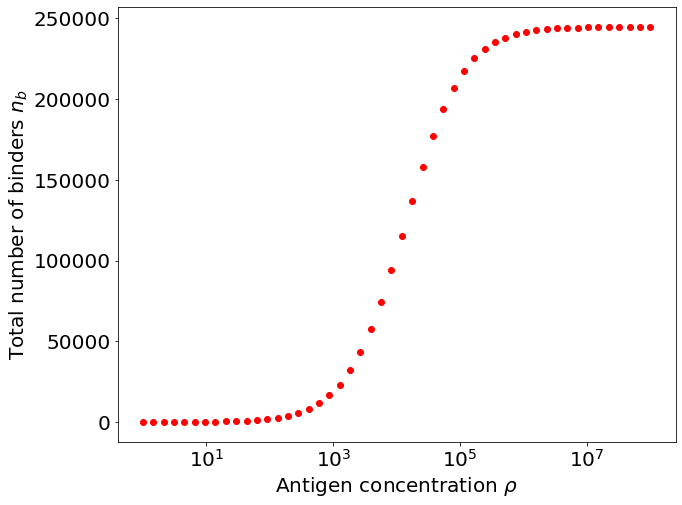

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
rho_array = np.logspace(0, 8, 50)
for rho in rho_array:
    ax.plot(rho, n_r(rho, 10, 1e-3, 2), 'or')
ax.set_xscale('log')
ax.set_xlabel(r'Antigen concentration $\rho$', fontsize = 20)
ax.set_ylabel(r'Total number of binders $n_b$', fontsize = 20)
ax.tick_params(labelsize = 20)

## Infection

In [21]:
U = 1e-12
R = 9
l = 3
T = 30
beta = 2
gamma = 0.1
eta = .5
intervals = 5000
Time = np.linspace(0,T, intervals)
delta_t = T/intervals
Rho = np.zeros(intervals)
N_r = np.zeros(intervals)
Rho[0] = 1
for i in range(1,intervals):
    N_r[i] = N_r[i-1] + (n_r(Rho[i-1], R, U, l) + gamma * N_r[i-1]*(1-(N_r[i-1]/1000)))*delta_t
    Rho[i] = Rho[i-1] + (beta*Rho[i-1] - eta*Rho[i-1]*np.cumsum(N_r*delta_t)[-1])*delta_t
#___________________________________________________________________
rho_array = np.logspace(0, 8, 100)
n_r_array = np.zeros_like(rho_array)
for i, rho in enumerate(rho_array):
    n_r_array[i] = n_r(rho, R, U, l)
    

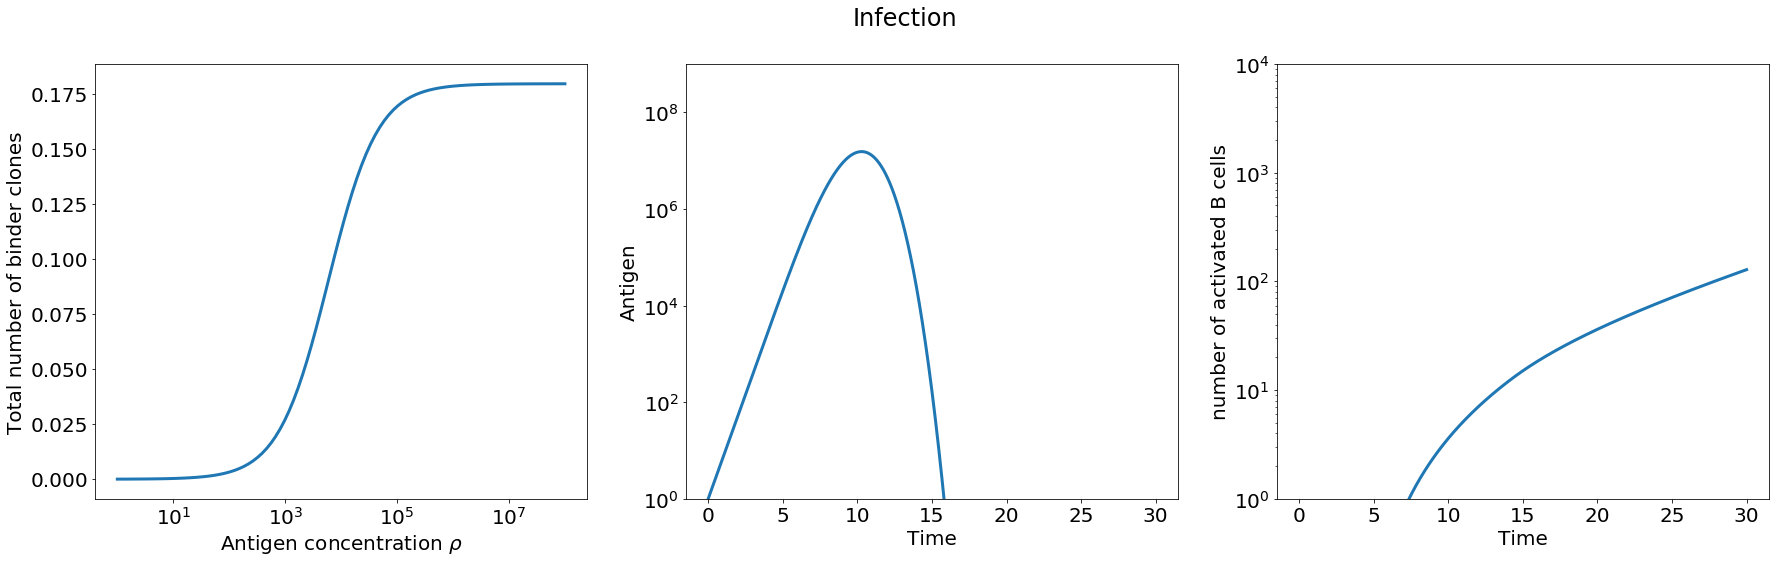

In [22]:
fig, ax = plt.subplots(1,3, figsize=(30,8))
fig.suptitle('Infection', fontsize = 24)
#___________________________________________________________________
ax[0].plot(rho_array, n_r_array, linewidth = 3)
#ax[0].plot(rho_array, beta*np.ones_like(rho_array))
ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlabel(r'Antigen concentration $\rho$', fontsize = 20)
ax[0].set_ylabel(r'Total number of binder clones', fontsize = 20)
ax[0].tick_params(labelsize = 20)
#ax[0].legend(fontsize = 20, loc=0)
#___________________________________________________________________
ax[1].plot(Time, Rho, linewidth = 3)
ax[1].set_xlabel(r'Time', fontsize = 20)
ax[1].set_ylabel(r'Antigen', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].set_ylim(1, 1e9)
#ax[1].set_xlim(0, .5)
ax[1].set_yscale('log')
#___________________________________________________________________
ax[2].plot(Time, np.cumsum(N_r*delta_t), linewidth = 3)
ax[2].set_xlabel(r'Time', fontsize = 20)
ax[2].set_ylabel(r'number of activated B cells', fontsize = 20)
ax[2].tick_params(labelsize = 20)
ax[2].set_ylim(1, 1e4)
#ax[2].set_xlim(0, .5)
ax[2].set_yscale('log')
#fig.savefig('../Figures/infection.png')

## Vaccination

In [21]:
U = 1e-6
R = 9
l = 2
T = 10
beta = 2
gamma = 0.1
eta = .01
intervals = 5000
Time = np.linspace(0,T, intervals)
delta_t = T/intervals
Rho = np.zeros(intervals)
N_r = np.zeros(intervals)
Rho[0] = 1e6
for i in range(1,intervals):
    N_r[i] = N_r[i-1] + (n_r(Rho[i-1], R, U, l) + gamma * N_r[i-1]*(1-(N_r[i-1]/1000)))*delta_t
    Rho[i] = Rho[i-1] - (eta*Rho[i-1]*np.cumsum(N_r*delta_t)[-1])*delta_t
#___________________________________________________________________
rho_array = np.logspace(0, 8, 100)
n_r_array = np.zeros_like(rho_array)
for i, rho in enumerate(rho_array):
    n_r_array[i] = n_r(rho, R, U, l)
    

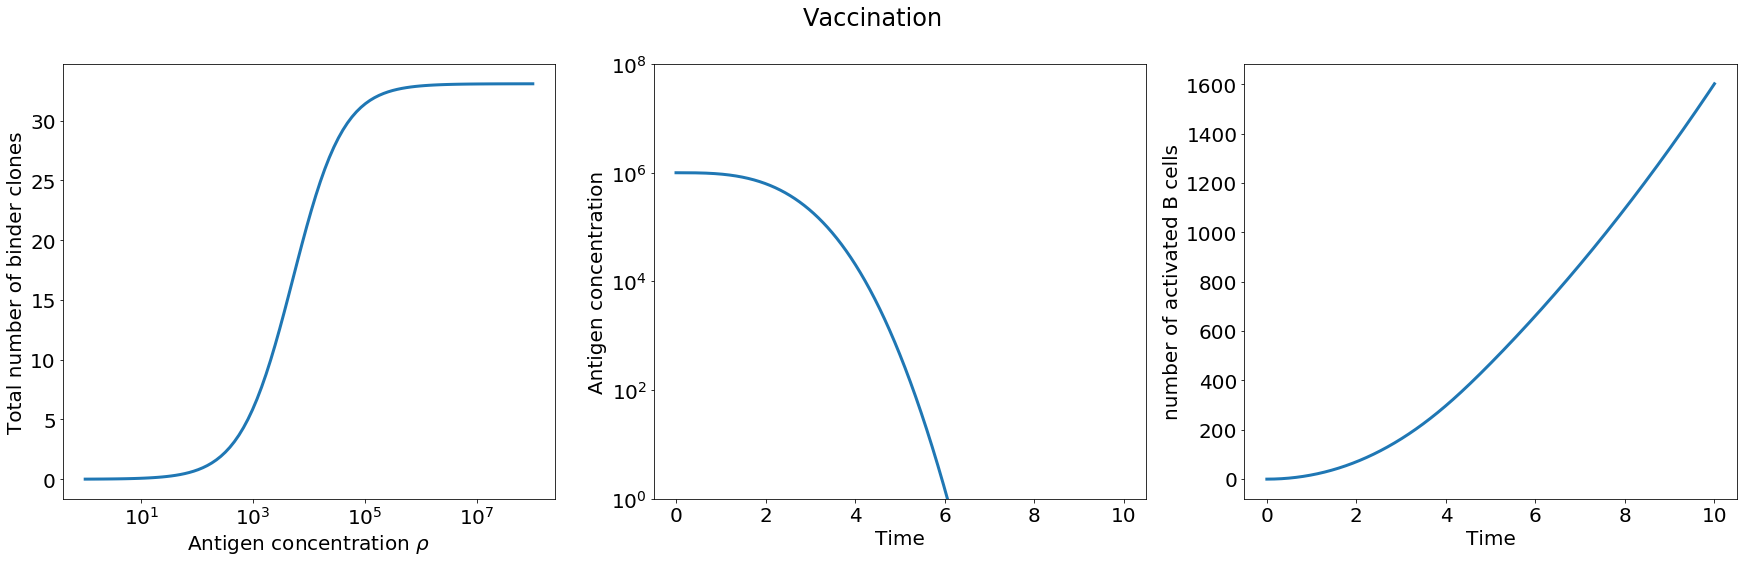

In [22]:
fig, ax = plt.subplots(1,3, figsize=(30,8))
fig.suptitle('Vaccination', fontsize = 24)
#___________________________________________________________________
ax[0].plot(rho_array, n_r_array, linewidth = 3)
#ax[0].plot(rho_array, beta*np.ones_like(rho_array))
ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlabel(r'Antigen concentration $\rho$', fontsize = 20)
ax[0].set_ylabel(r'Total number of binder clones', fontsize = 20)
ax[0].tick_params(labelsize = 20)
#ax[0].legend(fontsize = 20, loc=0)
#___________________________________________________________________
ax[1].plot(Time, Rho, linewidth = 3)
ax[1].set_xlabel(r'Time', fontsize = 20)
ax[1].set_ylabel(r'Antigen concentration', fontsize = 20)
ax[1].tick_params(labelsize = 20)
ax[1].set_ylim(1, 1e8)
#ax[1].set_xlim(0, .5)
ax[1].set_yscale('log')
#___________________________________________________________________
ax[2].plot(Time, np.cumsum(N_r*delta_t), linewidth = 3)
ax[2].set_xlabel(r'Time', fontsize = 20)
ax[2].set_ylabel(r'number of activated B cells', fontsize = 20)
ax[2].tick_params(labelsize = 20)
#ax[2].set_ylim(1, 1e8)
#ax[2].set_xlim(0, .5)
#ax[2].set_yscale('log')
fig.savefig('../Figures/vaccination.png')

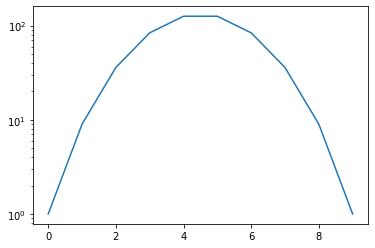

In [3]:

plt.plot(range(10), scipy.special.comb(9, range(10)))
plt.yscale('log')

In [4]:
4**9

262144

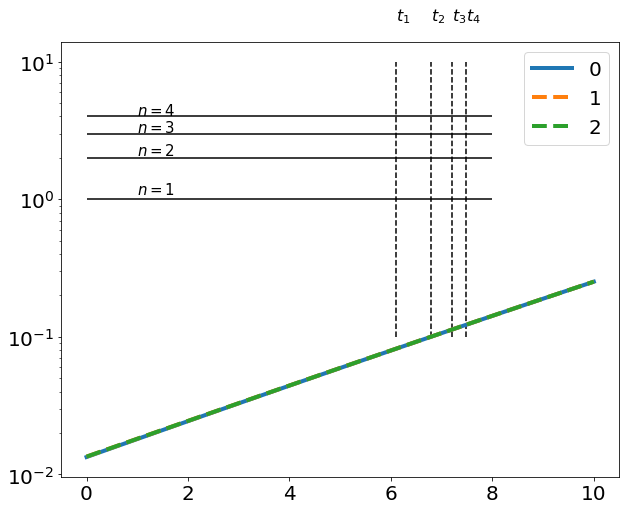

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
U = 2e-1
beta = 1/3
t = np.linspace(0, 10, 50)
N_b = (U*(np.exp(1*5)/1)*sc.hyp2f1(1,1,1+1,-np.exp(5+5-beta*t)) - (U/1)*sc.hyp2f1(1,1,1+1,-np.exp(5+5)))
N_b_2 = (U*(np.exp(1*5)/1)*np.log(1+np.exp(5+5-beta*t)))/(np.exp(5+5-beta*t)) 
N_b_3 = (U*(np.exp(-5 + beta*t))*(5+5-beta*t))


ax.plot(t, N_b, label = '0', linewidth = 4)
ax.plot(t, N_b_2, '--', label = '1', linewidth = 4)
ax.plot(t, N_b_3, '--', label = '2', linewidth = 4)

ax.hlines([1, 2, 3, 4], 0, 8)
ax.vlines(np.log((np.array([1,2,3,4]))/(U*beta*5)) + 5, .1, 10, linestyle = 'dashed')

ax.text(1,1.1, r'$n = 1$', fontsize = 15)
ax.text(1,2.1, r'$n = 2$', fontsize = 15)
ax.text(1,3.1, r'$n = 3$', fontsize = 15)
ax.text(1,4.1, r'$n = 4$', fontsize = 15)

ax.text(np.log((np.array([1]))/(U*beta*5)) + 5,20, r'$t_1$', fontsize = 16)
ax.text(np.log((np.array([2]))/(U*beta*5)) + 5,20, r'$t_2$', fontsize = 16)
ax.text(np.log((np.array([3]))/(U*beta*5)) + 5,20, r'$t_3$', fontsize = 16)
ax.text(np.log((np.array([4]))/(U*beta*5)) + 5,20, r'$t_4$', fontsize = 16)

#ax.text(0, 20, r'$t_n \approx \ln{\left(\frac{n}{UR}\right)} + R_0$', fontsize = 25)
ax.set_yscale('log')
ax.tick_params(labelsize = 20)
ax.legend(fontsize = 20)
fig.savefig('../Figures/first_k_times.png')

# MJM

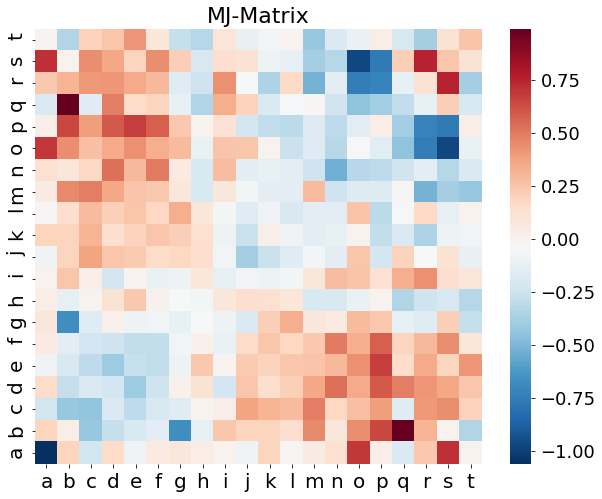

In [49]:
M = [[-1.06,0.19,-0.23,0.16,-0.08,0.06,0.08,0.04,0.00,-0.08,0.19,-0.02,0.05,0.13,0.69,0.03,-0.19,0.24,0.71,0.00],
 [0.19,0.04,-0.42,-0.28,-0.20,-0.14,-0.67,-0.13,0.25,0.19,0.19,0.14,0.46,0.08,0.44,0.65,0.99,0.31,0.00,-0.34],
 [-0.23,-0.42,-0.44,-0.19,-0.30,-0.2,-0.16,0.00,0.03,0.38,0.31,0.29,0.49,0.18,0.27,0.39,-0.16,0.41,0.44,0.20],
 [0.16,-0.28,-0.19,-0.22,-0.41,-0.25,0.02,0.11,-0.22,0.25,0.14,0.21,0.36,0.53,0.35,0.59,0.49,0.42,0.36,0.25],
 [-0.08,-0.20,-0.30,-0.41,-0.27,-0.29,-0.09,0.24,-0.01,0.23,0.20,0.25,0.26,0.30,0.43,0.67,0.16,0.35,0.19,0.42],
 [0.06,-0.14,-0.22,-0.25,-0.29,-0.29,-0.07,0.02,-0.10,0.16,0.25,0.18,0.24,0.50,0.34,0.58,0.19,0.30,0.44,0.09],
 [0.08,-0.67,-0.16,0.02,-0.09,-0.07,-0.12,-0.04,-0.09,-0.18,0.22,0.34,0.08,0.06,0.29,0.24,-0.12,-0.16,0.22,-0.28],
 [0.04,-0.13,0.00,0.11,0.24,0.02,-0.04,-0.06,0.09,0.14,0.13,0.09,-0.20,-0.20,-0.10,0.00,-0.34,-0.25,-0.21,-0.33],
 [0.00,0.25,0.03,-0.22,-0.01,-0.10,-0.09,0.09,-0.13,-0.07,-0.09,-0.06,0.08,0.28,0.26,0.12,0.34,0.43,0.14,0.10],
 [-0.08,0.19,0.38,0.25,0.23,0.16,0.18,0.14,-0.07,-0.38,-0.26,-0.16,-0.06,-0.14,0.25,-0.22,0.20,-0.04,0.11,-0.11],
 [0.19,0.19,0.31,0.14,0.20,0.25,0.22,0.13,-0.09,-0.26,0.03,-0.08,-0.14,-0.11,0.00,-0.29,-0.19,-0.35,-0.09,-0.07],
 [-0.02,0.14,0.29,0.21,0.25,0.18,0.34,0.09,-0.06,-0.16,-0.08,-0.20,-0.14,-0.14,0.26,-0.31,-0.05,0.17,-0.13,0.01],
 [0.05,0.46,0.49,0.36,0.26,0.24,0.08,-0.20,0.08,-0.06,-0.14,-0.14,0.29,-0.25,-0.17,-0.17,-0.02,-0.52,-0.38,-0.42],
 [0.13,0.08,0.18,0.53,0.30,0.50,0.06,-0.20,0.28,-0.14,-0.11,-0.14,-0.25,-0.53,-0.32,-0.30,-0.24,-0.14,-0.33,-0.18],
 [0.69,0.44,0.27,0.35,0.43,0.34,0.29,-0.10,0.26,0.25,0.00,-0.26,-0.17,-0.32,-0.03,-0.15,-0.45,-0.74,-0.97,-0.10],
 [0.03,0.65,0.39,0.59,0.67,0.58,0.24,0.00,0.12,-0.22,-0.29,-0.31,-0.17,-0.30,-0.15,0.04,-0.39,-0.72,-0.76,0.04],
 [-0.19,0.99,-0.16,0.49,0.16,0.19,-0.12,-0.34,0.34,0.20,-0.19,-0.05,-0.02,-0.24,-0.45,-0.39,-0.29,-0.12,0.22,-0.21],
 [0.24,0.31,0.41,0.42,0.35,0.30,-0.16,-0.25,0.43,-0.04,-0.35,0.17,-0.52,-0.14,-0.74,-0.72,-0.12,0.11,0.75,-0.38],
 [0.71,0.00,0.44,0.36,0.19,0.44,0.22,-0.21,0.14,0.11,-0.09,-0.13,-0.38,-0.33,-0.97,-0.76,0.22,0.75,0.25,0.11],
 [0.00,-0.34,0.20,0.25,0.42,0.09,-0.28,-0.33,0.10,-0.11,-0.07,0.01,-0.42,-0.18,-0.10,0.04,-0.21,-0.38,0.11,0.26]]
Alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.flip(M, axis = 0), ax = ax, cmap=plt.cm.RdBu_r)
#sns.heatmap(M, ax = ax)
ax.set_title('MJ-Matrix', fontsize = 22)
ax.tick_params(labelsize = 20)
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't'])
ax.set_yticklabels(np.flip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']));
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)


In [8]:
seq = 'bfdgghdfg'
seq_comp = find_complementary_seq(sequence=seq, Energy_Matrix=M)

In [12]:
calculate_energy(Energy_Matrix=M, seq1=seq, seq2=seq_comp), calculate_energy(Energy_Matrix=M, seq1='badgghdfg', seq2=seq_comp)


(-14.859999999999996, -13.259999999999993)

In [29]:
calculate_energy(M, find_complementary_seq('rfbsjnqqd', M),'rfbsjnqqd')

-6.200000000000002

In [30]:
calculate_energy(M, find_complementary_seq('rfbsjnqqd', M),'rcbsinsqd')

-8.169999999999998

In [32]:
find_complementary_seq('abgt', M), find_complementary_seq('agbm', M)

('agbm', 'abgr')

In [33]:
def mutate_sequence(Sequence, Energy_Matrix):
        """ This function will create a new mutations and give an energy value to the new sequence according to the Energy_Matrix. """
        Sequence.pos_mut = np.random.randint(9)
        list_seq = list(Sequence.sequence)
        old_letter = Sequence.sequence[Sequence.pos_mut]
        Sequence.Alphabet.remove(old_letter)
        new_letter = np.random.choice(Sequence.Alphabet)
        list_seq[Sequence.pos_mut] = new_letter
        Sequence.sequence = "".join(list_seq)
        Sequence.hamming_distance = hamming_distance(Sequence.master_sequence, Sequence.sequence)
        Sequence.Alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
        Sequence.calculate_delta_energy(Energy_Matrix = Energy_Matrix, old_letter = old_letter, new_letter = new_letter)


In [102]:
Alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
antigen_sequence = "".join(np.random.choice(Alphabet, 9))
print('Antigen Seq: ' + antigen_sequence + '\n')

master_sequence = find_complementary_seq(sequence = antigen_sequence , Energy_Matrix =  M)
print('Master Seq: ' + master_sequence + '\n')

master_sequence_energy = calculate_energy(Energy_Matrix = M, seq1 = master_sequence, seq2 = antigen_sequence)

print('Master Seq energy: ', master_sequence_energy, '\n')

Master_Sequence = Sequence(seq_id = 0, parent = master_sequence, energy_parent = master_sequence_energy, Master_Seq=True, master_sequence = master_sequence, complementary_sequence = antigen_sequence, Energy_Matrix = M)
Master_Sequence2 = Sequence(seq_id = 0, parent = master_sequence, energy_parent = master_sequence_energy, Master_Seq=True, master_sequence = master_sequence, complementary_sequence = antigen_sequence, Energy_Matrix = M)



Antigen Seq: gckfhgdck

Master Seq: bcreqbecr

Master Seq energy:  -8.379999999999995 



In [103]:
import pickle
Master_Sequence2.sequence = 'asmgnfhee'
with open('Sequences_data.pkl', 'wb') as output:
    
    pickle.dump(Master_Sequence, output, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(Master_Sequence2, output, pickle.HIGHEST_PROTOCOL)

del Master_Sequence
del Master_Sequence2

with open('Sequences_data.pkl', 'rb') as input:
    Master_Sequence = pickle.load(input)
    print(Master_Sequence.sequence)
    
    Master_Sequence = pickle.load(input)
    print(Master_Sequence.sequence)


bcreqbecr
asmgnfhee


In [6]:
for i, k in enumerate([1,2,5,7]):
    print(k,i)

1 0
2 1
5 2
7 3


In [9]:
20*np.exp(5)

2968.263182051532

In [82]:
M = np.loadtxt('../Text_files/MJ.txt', skiprows= 1, usecols=range(1,21)).tolist()

In [109]:
M2 = np.loadtxt('../Text_files/MJ2.txt', skiprows= 1, usecols=range(1,21))
M2

array([[-5.44, -5.05, -5.63, -5.03, -5.03, -4.46, -4.76, -3.89, -3.38,
        -3.16, -2.88, -2.86, -2.73, -2.59, -2.08, -2.66, -3.63, -2.7 ,
        -1.54, -2.92],
       [ 0.  , -6.06, -6.68, -6.33, -6.01, -5.52, -6.37, -4.92, -3.99,
        -3.75, -3.73, -3.55, -3.17, -3.5 , -3.19, -2.9 , -3.31, -3.49,
        -3.11, -4.11],
       [ 0.  ,  0.  , -6.85, -6.39, -6.26, -5.75, -6.02, -4.95, -4.36,
        -3.72, -3.76, -3.56, -3.3 , -3.55, -3.51, -3.31, -4.61, -3.54,
        -2.83, -3.73],
       [ 0.  ,  0.  ,  0.  , -6.22, -6.17, -5.58, -5.64, -4.63, -4.41,
        -3.65, -3.74, -3.43, -3.22, -2.99, -3.23, -2.91, -3.76, -3.33,
        -2.7 , -3.47],
       [ 0.  ,  0.  ,  0.  ,  0.  , -5.79, -5.38, -5.5 , -4.26, -3.96,
        -3.43, -3.43, -3.16, -3.09, -2.99, -2.91, -2.59, -3.84, -3.15,
        -2.63, -3.06],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -4.94, -5.05, -4.05, -3.62,
        -3.06, -2.95, -2.79, -2.67, -2.36, -2.56, -2.25, -3.38, -2.78,
        -1.95, -2.96],
       [ 0

In [107]:
M2 = M2 + np.transpose(M2) - np.diagflat(np.diagonal(M2))

In [108]:
df = pd.DataFrame(M2, index=Alphabet, columns=Alphabet)
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t
a,-5.44,-5.05,-5.63,-5.03,-5.03,-4.46,-4.76,-3.89,-3.38,-3.16,-2.88,-2.86,-2.73,-2.59,-2.08,-2.66,-3.63,-2.70,-1.54,-2.92
b,-5.05,-6.06,-6.68,-6.33,-6.01,-5.52,-6.37,-4.92,-3.99,-3.75,-3.73,-3.55,-3.17,-3.50,-3.19,-2.90,-3.31,-3.49,-3.11,-4.11
c,-5.63,-6.68,-6.85,-6.39,-6.26,-5.75,-6.02,-4.95,-4.36,-3.72,-3.76,-3.56,-3.30,-3.55,-3.51,-3.31,-4.61,-3.54,-2.83,-3.73
d,-5.03,-6.33,-6.39,-6.22,-6.17,-5.58,-5.64,-4.63,-4.41,-3.65,-3.74,-3.43,-3.22,-2.99,-3.23,-2.91,-3.76,-3.33,-2.70,-3.47
e,-5.03,-6.01,-6.26,-6.17,-5.79,-5.38,-5.50,-4.26,-3.96,-3.43,-3.43,-3.16,-3.09,-2.99,-2.91,-2.59,-3.84,-3.15,-2.63,-3.06
f,-4.46,-5.52,-5.75,-5.58,-5.38,-4.94,-5.05,-4.05,-3.62,-3.06,-2.95,-2.79,-2.67,-2.36,-2.56,-2.25,-3.38,-2.78,-1.95,-2.96
g,-4.76,-6.37,-6.02,-5.64,-5.50,-5.05,-5.42,-4.44,-3.93,-3.37,-3.31,-2.95,-3.16,-3.11,-2.94,-2.91,-4.02,-3.56,-2.49,-3.66
h,-3.89,-4.92,-4.95,-4.63,-4.26,-4.05,-4.44,-3.55,-2.85,-2.50,-2.48,-2.30,-2.53,-2.47,-2.42,-2.25,-3.33,-2.75,-2.01,-2.80
i,-3.38,-3.99,-4.36,-4.41,-3.96,-3.62,-3.93,-2.85,-2.51,-2.15,-2.15,-1.89,-1.70,-1.44,-1.51,-1.57,-2.09,-1.50,-1.10,-1.81
j,-3.16,-3.75,-3.72,-3.65,-3.43,-3.06,-3.37,-2.50,-2.15,-2.17,-2.03,-1.70,-1.54,-1.56,-1.22,-1.62,-1.94,-1.68,-0.84,-1.72


In [110]:
df.to_csv(r'../Text_files/MJ2.txt', header=Alphabet, index=Alphabet, sep='\t', mode = 'w')

In [3]:
(2.479*1000)/(4.11e-21*6.02214076e23)

1.0015757536554664

In [7]:
20*np.exp(6)

8068.575869854702

In [6]:
10/(10+np.exp(-10))

0.9999954600276352